In [275]:
repo_path = "/home/students/s396616/Desktop/umz1/Projekt/mieszkania3"

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [277]:
train_data_path = "{}/train/train.tsv".format(repo_path)
train_data = pd.read_csv(train_data_path, delimiter='\t', encoding = 'utf-8', lineterminator = '\n')

In [4]:
train_data['Powierzchnia w m2'].max()

11930

In [525]:
train_data

,cena,Powierzchnia w m2,Liczba pokoi,Miejsce parkingowe,Liczba pięter w budynku,Piętro,Typ zabudowy,Okna,Materiał budynku,Rok budowy,Forma własności,Forma kuchni,Stan,Stan instalacji,Głośność,Droga dojazdowa,Stan łazienki,Powierzchnia działki w m2,opis
0,290386,46,2,brak miejsca parkingowego,5.0,parter,apartamentowiec,plastikowe/PCV,cegła,2017.0,własność,w aneksie,stan deweloperski,nowa,NaN,NaN,NaN,NaN,"Polecam mieszkanie 2 pokojowe o metrażu 46,68..."
1,450000,59,2,brak miejsca parkingowego,3.0,2,kamienica,plastikowe/PCV,cegła,1902.0,własność,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,Ekskluzywna oferta - tylko u nas! Projekt arc...
2,375000,79,3,brak miejsca parkingowego,16.0,5,blok,NaN,płyta,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polecam do kupna przestronne mieszkanie trzyp...
3,400000,63,3,w garażu,2.0,2,blok,plastikowe/PCV,cegła,2009.0,własność,odzielna,NaN,NaN,ciche,NaN,bardzo dobry,NaN,Dla rodziny albo pod wynajem. Świetna lokaliz...
4,389285,59,3,brak miejsca parkingowego,13.0,12,blok,NaN,NaN,NaN,NaN,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,539000,90,4,przynależne na ulicy,1.0,1,dom wielorodzinny/szeregowiec,NaN,NaN,NaN,własność,w aneksie,NaN,NaN,NaN,NaN,bardzo dobry,NaN,Drodzy PaństwoZapraszam do zapoznania się z p...
6,380931,66,3,w garażu,3.0,3,blok,plastikowe/PCV,cegła,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rozkładowe, przestronne mieszkanie na trzecim..."
7,225000,32,1,brak miejsca parkingowego,NaN,2,blok,plastikowe/PCV,płyta,NaN,NaN,NaN,NaN,po wymianie,umiarkowanie ciche,NaN,bardzo dobry,NaN,Zapraszam do zapoznania się z ofertą sprzedaż...
8,235582,38,2,przynależne na ulicy,7.0,3,blok,NaN,silikat,NaN,własność,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,664443,68,3,brak miejsca parkingowego,5.0,3,apartamentowiec,NaN,cegła,NaN,własność,w aneksie,NaN,NaN,NaN,NaN,NaN,NaN,Zapraszamy do zapoznania się z inwestycją fir...


In [5]:
train = train_data[['Powierzchnia w m2','cena']]

In [79]:
train_data['Stan instalacji'].unique()

array([' nowa', nan, ' po wymianie', ' częściowo wymieniona',
       ' do wymiany'], dtype=object)

In [6]:
train_data['Stan'].unique()

array([' stan deweloperski', nan, ' wykończony', ' dobry', ' do remontu',
       ' do rozbiórki', ' świeżo po remoncie', ' wysoki standard',
       ' do odświeżenia', ' do wykończenia', ' stan surowy zamknięty',
       ' w budowie'], dtype=object)

In [8]:
train_data['Piętro'].unique()

array([' parter', ' 2', ' 5', ' 12', ' 1', ' 3', nan, ' 8', ' 4', ' 16',
       ' 7', ' 6', ' poddasze', ' 9', ' 11', ' 13', ' 14', ' 10', ' 15',
       ' niski parter'], dtype=object)

In [8]:
train_data['Droga dojazdowa'].unique()

array([nan, ' asfaltowa', ' utwardzana', ' kostka brukowa', ' polna'],
      dtype=object)

In [9]:
train_data['Typ zabudowy'].unique()

array([' apartamentowiec', ' kamienica', ' blok',
       ' dom wielorodzinny/szeregowiec', nan, ' plomba'], dtype=object)

In [10]:
train_data['Forma własności'].unique()

array([' własność', nan, ' spółdzielcze własnościowe',
       ' spółdzielcze własnościowe z KW', ' udział'], dtype=object)

In [74]:
train_data['Okna'].unique()

array([' plastikowe/PCV', nan, ' drewniane'], dtype=object)

In [76]:
train_data['Głośność'].unique()

array([nan, ' ciche', ' umiarkowanie ciche', ' umiarkowanie głośne',
       ' głośne'], dtype=object)

In [278]:
replace_dict = {' plastikowe/PCV': 2, ' drewniane': 1}
train_data['Okna'] = train_data['Okna'].map(replace_dict)

replace_dict = {' nowa': 4, ' po wymianie': 3, ' częściowo wymieniona': 2,
       ' do wymiany': 1}
train_data['Stan instalacji'] = train_data['Stan instalacji'].map(replace_dict)
replace_dict = {' ciche': 4, ' umiarkowanie ciche': 3, ' umiarkowanie głośne': 2,
       ' głośne': 1}
train_data['Głośność'] = train_data['Głośność'].map(replace_dict)
replace_dict = { ' kamien': 2, ' plyta': 1, ' silikat': 6, ' beton': 3,
                 ' drewno': 5, ' cegła': 4, ' pustak': 7, ' inne': 8 }
train_data['Materiał budynku'] = train_data['Materiał budynku'].map(replace_dict)
replace_dict = {' parter': 0.5, ' 2': 2, ' 5': 5, ' 12': 12, ' 1': 1, ' 3': 3, ' 8': 8, ' 4': 4, ' 16': 16,
       ' 7': 7, ' 6': 6, ' poddasze': 17, ' 9': 9, ' 11': 11, ' 13': 13, ' 14': 14, ' 10': 10, ' 15': 15,
       ' niski parter': 18}
train_data['Piętro'] = train_data['Piętro'].map(replace_dict)

replace_dict = {' brak miejsca parkingowego': 0, ' w garażu': 1, ' przynależne na ulicy': 2, ' parking strzeżony': 3,
                ' pod wiatą': 4}
train_data['Miejsce parkingowe'] = train_data['Miejsce parkingowe'].map(replace_dict)

replace_dict = {' apartamentowiec': 5, ' kamienica': 3, ' blok': 2,
       ' dom wielorodzinny/szeregowiec': 4, ' plomba': 1}
train_data['Typ zabudowy'] = train_data['Typ zabudowy'].map(replace_dict)

replace_dict = {' własność': 3, ' spółdzielcze własnościowe': 2,
       ' spółdzielcze własnościowe z KW': 2, ' udział': 1}
train_data['Forma własności'] = train_data['Forma własności'].map(replace_dict)

replace_dict = {' w aneksie': 1, ' odzielna': 2, ' prześwit': 3}
train_data['Forma kuchni'] = train_data['Forma kuchni'].map(replace_dict)

replace_dict = {' asfaltowa': 1, ' utwardzana': 2, ' kostka brukowa': 3, ' polna':4}
train_data['Droga dojazdowa'] = train_data['Droga dojazdowa'].map(replace_dict)

replace_dict = {' bardzo dobry': 1, ' dobry': 2, ' do odnowienia': 3, ' do remontu': 4}
train_data['Stan łazienki'] = train_data['Stan łazienki'].map(replace_dict)

In [279]:
replace_dict = {' stan deweloperski': 1, ' wykończony': 2, ' dobry': 2, ' do remontu': 1,
       ' do rozbiórki': 1, ' świeżo po remoncie': 3, ' wysoki standard': 3,
       ' do odświeżenia': 1, ' do wykończenia': 1, ' stan surowy zamknięty': 1,
       ' w budowie': 1}
train_data['Stan'] = train_data['Stan'].map(replace_dict)

In [280]:
train_data['Typ zabudowy'] = train_data['Typ zabudowy'].fillna(1)

In [281]:
train_data['Rok budowy'] = train_data['Rok budowy'].fillna(0)

In [8]:
train_data['Liczba pięter w budynku'].unique()

array([ 5.,  3., 16.,  2., 13.,  1., nan,  7.,  8.,  4., 15.,  6., 10.,
       12., 11., 14.,  9., 18.])

In [282]:
train_data['Liczba pięter w budynku'] = train_data['Liczba pięter w budynku'].fillna(20)

In [283]:
train_data['Powierzchnia działki w m2'] = train_data['Powierzchnia działki w m2'].fillna(train_data['Powierzchnia działki w m2'].mean())

In [284]:
train_data['Stan'] = train_data['Stan'].fillna(1)

In [285]:
train_data['Forma własności'] = train_data['Forma własności'].fillna(1)

In [286]:
train_data = train_data.fillna(0)

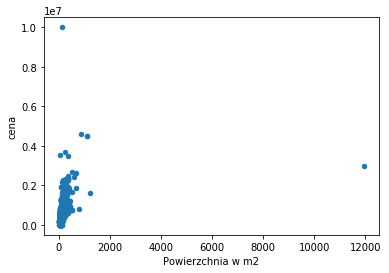

In [9]:
train.plot(kind='scatter', x=0, y=1)

In [16]:
#Z tego wykresu można zauważyć, że istnieją 2 obserwacje odstające, które mogą odegrać znaczący wpływ na dalszą analizę.

In [592]:
X = train_data[train_data['cena'] != train_data['cena'].max()]
X = X[X['Powierzchnia w m2'] != X['Powierzchnia w m2'].max()]

In [86]:
X.mean()

cena                         417351.358793
Powierzchnia w m2                74.014992
Liczba pokoi                      2.844003
Miejsce parkingowe                0.441248
Liczba pięter w budynku           5.316304
Piętro                            2.832875
Typ zabudowy                      2.463451
Okna                              1.930978
Materiał budynku                  4.389677
Rok budowy                     1984.836624
Forma własności                   3.650718
Forma kuchni                      1.397783
Stan                              4.183571
Stan instalacji                   3.528155
Głośność                          3.543323
Droga dojazdowa                   1.346000
Stan łazienki                     1.577750
Powierzchnia działki w m2      1258.526358
dtype: float64

In [16]:
trainX = X[['Powierzchnia w m2','cena', 'Miejsce parkingowe', 'Typ zabudowy', 'Rok budowy',
           'Forma własności', 'Forma kuchni', 'Stan', 'Droga dojazdowa','Stan łazienki', 'Powierzchnia działki w m2']]

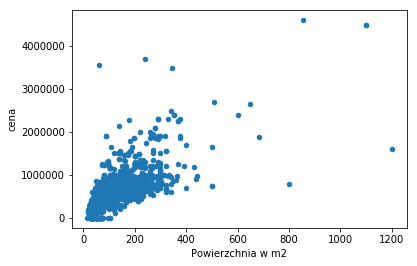

In [17]:
trainX.plot(kind='scatter', x=0, y=1)

In [21]:
#Teraz wykres nie pokazuje już obserwacji mocno odstających.


In [14]:
A_columns = ['Powierzchnia w m2','Liczba pokoi','Okna', 'Rok budowy' 
         'Liczba pięter w budynku', 'Piętro', 'Powierzchnia działki w m2']
b_column = ["cena"]

In [583]:
A = train_data[A_columns].values
b = train_data[b_column].values

print("A shape: ", A.shape)
print("b shape: ", b.shape)

A shape:  (4938, 7)
b shape:  (4938, 1)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
from xgboost import XGBClassifier

In [18]:
import xgboost as xgb

In [212]:
model7 = RandomForestRegressor(n_estimators = 800, random_state = 0)

In [213]:
model9 = xgb.XGBRegressor(objective="reg:linear", booster="gbtree", seed=123)

In [214]:
model9.fit(A,b)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [582]:
A_columns = ['Powierzchnia w m2','Liczba pokoi','Okna', 'Rok budowy',
             'Liczba pięter w budynku', 'Piętro', 'Powierzchnia działki w m2']
b_column = ["cena"]

In [510]:
model7.fit(A,b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [636]:
for i in range(1,50):
    model6 = tree.DecisionTreeClassifier('entropy', max_depth = 65)
    model6.fit(A,b)
    valid_predicted6 = model6.predict(A_valid)
    rmse6 = np.sqrt(mean_squared_error(b_valid, valid_predicted6))
    print("Root Mean Squared Error: {}".format(rmse6))
    if rmse6 <= 172500:
        break

Root Mean Squared Error: 213478.17796003414
Root Mean Squared Error: 187267.01639782698
Root Mean Squared Error: 187985.9702269986
Root Mean Squared Error: 190139.52715240457
Root Mean Squared Error: 238011.26384857923
Root Mean Squared Error: 238713.7799999112
Root Mean Squared Error: 193999.0277931052
Root Mean Squared Error: 224508.7236761681
Root Mean Squared Error: 218735.7577485812
Root Mean Squared Error: 181779.76602909356
Root Mean Squared Error: 249508.88872652213
Root Mean Squared Error: 238541.94542820347
Root Mean Squared Error: 176980.0523578519
Root Mean Squared Error: 257103.75327223053
Root Mean Squared Error: 191681.37804926172
Root Mean Squared Error: 189745.473428032
Root Mean Squared Error: 209140.54027102923
Root Mean Squared Error: 188890.8049122879
Root Mean Squared Error: 209225.24561354922
Root Mean Squared Error: 229322.81665139212
Root Mean Squared Error: 207313.26484589934
Root Mean Squared Error: 177483.193440703
Root Mean Squared Error: 206198.4433866027


In [630]:
model6

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=96,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [610]:
model6.fit(A,b)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=35,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [611]:
valid_predicted6 = model6.predict(A_valid)

In [612]:
rmse6 = np.sqrt(mean_squared_error(b_valid, valid_predicted6))
print("Root Mean Squared Error: {}".format(rmse6))

Root Mean Squared Error: 198198.5313816023


In [39]:
valid_data_A = pd.read_csv("{}/dev-0/in.tsv".format(repo_path),
                           delimiter='\t',
                           encoding='utf-8',
                           lineterminator='\n',
                           names=train_data.columns[1:])

valid_data_b = pd.read_csv("{}/dev-0/expected.tsv".format(repo_path),
                           delimiter='\t',
                           encoding='utf-8',
                           lineterminator='\n',
                           names=train_data.columns[:1])


In [40]:
test_data_A = pd.read_csv("{}/test-A/in.tsv".format(repo_path),
                           delimiter='\t',
                           encoding='utf-8',
                           lineterminator='\n',
                           names=train_data.columns[1:])



In [41]:
replace_dict = {' nowa': 4, ' po wymianie': 3, ' częściowo wymieniona': 2,
       ' do wymiany': 1}
valid_data_A['Stan instalacji'] = valid_data_A['Stan instalacji'].map(replace_dict)
test_data_A['Stan instalacji'] = test_data_A['Stan instalacji'].map(replace_dict)

replace_dict = {' ciche': 4, ' umiarkowanie ciche': 3, ' umiarkowanie głośne': 2,
       ' głośne': 1}
valid_data_A['Głośność'] = valid_data_A['Głośność'].map(replace_dict)
test_data_A['Głośność'] = test_data_A['Głośność'].map(replace_dict)

replace_dict = {' plastikowe/PCV': 2, ' drewniane': 1}
valid_data_A['Okna'] = valid_data_A['Okna'].map(replace_dict)
test_data_A['Okna'] = test_data_A['Okna'].map(replace_dict)
replace_dict = { ' kamien': 2, ' plyta': 1, ' silikat': 6, ' beton': 3,
                 ' drewno': 5, ' cegła': 4, ' pustak': 7, ' inne': 8 }
valid_data_A['Materiał budynku'] = valid_data_A['Materiał budynku'].map(replace_dict)
test_data_A['Materiał budynku'] = test_data_A['Materiał budynku'].map(replace_dict)
replace_dict = {' parter': 0.5, ' 2': 2, ' 5': 5, ' 12': 12, ' 1': 1, ' 3': 3, ' 8': 8, ' 4': 4, ' 16': 16,
       ' 7': 7, ' 6': 6, ' poddasze': 17, ' 9': 9, ' 11': 11, ' 13': 13, ' 14': 14, ' 10': 10, ' 15': 15,
       ' niski parter': 18}
valid_data_A['Piętro'] = valid_data_A['Piętro'].map(replace_dict)
test_data_A['Piętro'] = test_data_A['Piętro'].map(replace_dict)
replace_dict = {' apartamentowiec': 5, ' kamienica': 3, ' blok': 2,
       ' dom wielorodzinny/szeregowiec': 4, ' plomba': 1}
valid_data_A['Typ zabudowy'] = valid_data_A['Typ zabudowy'].map(replace_dict)
test_data_A['Typ zabudowy'] = test_data_A['Typ zabudowy'].map(replace_dict)

replace_dict = {' własność': 3, ' spółdzielcze własnościowe': 2,
       ' spółdzielcze własnościowe z KW': 2, ' udział': 1}
valid_data_A['Forma własności'] = valid_data_A['Forma własności'].map(replace_dict)
test_data_A['Forma własności'] = test_data_A['Forma własności'].map(replace_dict)

replace_dict = {' w aneksie': 1, ' odzielna': 2, ' prześwit': 3}
valid_data_A['Forma kuchni'] = valid_data_A['Forma kuchni'].map(replace_dict)
test_data_A['Forma kuchni'] = test_data_A['Forma kuchni'].map(replace_dict)

replace_dict = {' asfaltowa': 1, ' utwardzana': 2, ' kostka brukowa': 3, ' polna':4}
valid_data_A['Droga dojazdowa'] = valid_data_A['Droga dojazdowa'].map(replace_dict)
test_data_A['Droga dojazdowa'] = test_data_A['Droga dojazdowa'].map(replace_dict)

replace_dict = {' bardzo dobry': 1, ' dobry': 2, ' do odnowienia': 3, ' do remontu': 4}
valid_data_A['Stan łazienki'] = valid_data_A['Stan łazienki'].map(replace_dict)
test_data_A['Stan łazienki'] = test_data_A['Stan łazienki'].map(replace_dict)


replace_dict = {' stan deweloperski': 1, ' wykończony': 2, ' dobry': 2, ' do remontu': 1,
       ' do rozbiórki': 1, ' świeżo po remoncie': 3, ' wysoki standard': 3,
       ' do odświeżenia': 1, ' do wykończenia': 1, ' stan surowy zamknięty': 1,
       ' w budowie': 1}
valid_data_A['Stan'] = valid_data_A['Stan'].map(replace_dict)
test_data_A['Stan'] = test_data_A['Stan'].map(replace_dict)

replace_dict = {' 2': 2, ' 3': 3, ' 4': 4, ' 1': 1, ' 5': 5, ' 6': 6, ' więcej niż 8': 9, ' 8': 8, ' 7': 7}
test_data_A['Liczba pokoi'] = test_data_A['Liczba pokoi'].map(replace_dict)

In [44]:
valid_data_A['Rok budowy'] = valid_data_A['Rok budowy'].fillna(0)
valid_data_A['Stan'] = valid_data_A['Stan'].fillna(1)
valid_data_A['Forma własności'] = valid_data_A['Forma własności'].fillna(1)
valid_data_A['Powierzchnia działki w m2'] = valid_data_A['Powierzchnia działki w m2'].fillna(valid_data_A['Powierzchnia działki w m2'].mean())
valid_data_A['Typ zabudowy'] = valid_data_A['Typ zabudowy'].fillna(1)
valid_data_A = valid_data_A.fillna(0)

In [42]:
valid_data_A['Liczba pięter w budynku'] = valid_data_A['Liczba pięter w budynku'].fillna(21)

In [45]:
test_data_A['Rok budowy'] = test_data_A['Rok budowy'].fillna(0)
test_data_A['Powierzchnia działki w m2'] = test_data_A['Powierzchnia działki w m2'].fillna(test_data_A['Powierzchnia działki w m2'].mean())
test_data_A['Typ zabudowy'] = test_data_A['Typ zabudowy'].fillna(1)
test_data_A = test_data_A.fillna(0)

In [43]:
test_data_A['Liczba pięter w budynku'] = test_data_A['Liczba pięter w budynku'].fillna(21)

In [584]:
A_valid = valid_data_A[A_columns].values
b_valid = valid_data_b[b_column].values
A_test = test_data_A[A_columns].values

In [256]:
print("A shape: ", A_valid.shape)
print("b shape: ", b_valid.shape)

A shape:  (500, 6)
b shape:  (500, 1)


In [248]:
valid_predicted7 = model7.predict(A_valid)

In [249]:
valid_predicted9 = model9.predict(A_valid)

In [637]:
rmse6 = np.sqrt(mean_squared_error(b_valid, valid_predicted6))
print("Root Mean Squared Error: {}".format(rmse6))

Root Mean Squared Error: 170489.00720558496


In [251]:
from sklearn.metrics import mean_squared_error
rmse7 = np.sqrt(mean_squared_error(b_valid, valid_predicted7))
print("Root Mean Squared Error: {}".format(rmse7))

Root Mean Squared Error: 195985.52872144405


In [252]:
rmse9 = np.sqrt(mean_squared_error(b_valid, valid_predicted9))
print("Root Mean Squared Error: {}".format(rmse9))

Root Mean Squared Error: 220266.36483309497


In [638]:
test_predicted = model6.predict(A_test)

In [639]:
pd.Series(valid_predicted6.flatten()).to_csv("{}/dev-0/out.tsv".format(repo_path),
                                            sep='\t',
                                            index=None)

pd.Series(test_predicted.flatten()).to_csv("{}/test-A/out.tsv".format(repo_path),
                                           sep='\t',
                                           index=None)